In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [230]:
file = 'docs/metall_rates.csv'
df = pd.read_csv(file, decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    191 non-null    object 
 1   gold    191 non-null    float64
 2   silver  191 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


In [231]:
df.head()

,date,gold,silver
0,17.10.2020,4783.12,61.06
1,16.10.2020,4740.64,59.98
2,15.10.2020,4711.68,60.06
3,14.10.2020,4772.77,61.96
4,13.10.2020,4754.14,62.06


In [233]:
df['date'] = pd.to_datetime(df['date'],
                           format = '%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    191 non-null    datetime64[ns]
 1   gold    191 non-null    float64       
 2   silver  191 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.6 KB


In [234]:
df.tail(30)

,date,gold,silver
161,2020-02-19,3256.20,36.49
162,2020-02-18,3216.56,36.04
163,2020-02-15,3215.88,35.99
164,2020-02-14,3220.62,35.91
165,2020-02-13,3175.81,35.89
166,2020-02-12,3223.20,36.57
167,2020-02-11,3227.24,36.43
168,2020-02-08,3200.38,36.25
169,2020-02-07,3159.22,35.57
170,2020-02-06,3152.67,36.01


In [235]:
df.date = df.date.sort_values()

In [236]:
df.head(30)

,date,gold,silver
0,2020-10-17,4783.12,61.06
1,2020-10-16,4740.64,59.98
2,2020-10-15,4711.68,60.06
3,2020-10-14,4772.77,61.96
4,2020-10-13,4754.14,62.06
5,2020-10-10,4736.09,60.22
6,2020-10-09,4737.92,60.02
7,2020-10-08,4740.23,59.08
8,2020-10-07,4827.56,61.34
9,2020-10-06,4771.68,60.07


In [237]:
df.tail(30)

,date,gold,silver
161,2020-02-19,3256.20,36.49
162,2020-02-18,3216.56,36.04
163,2020-02-15,3215.88,35.99
164,2020-02-14,3220.62,35.91
165,2020-02-13,3175.81,35.89
166,2020-02-12,3223.20,36.57
167,2020-02-11,3227.24,36.43
168,2020-02-08,3200.38,36.25
169,2020-02-07,3159.22,35.57
170,2020-02-06,3152.67,36.01


In [238]:
# create date_range
# end - 2020-10-17
yeardays = pd.date_range(start=pd.datetime(2020, 1, 1),
                           end=pd.datetime(2020, 10, 17))
yeardays

<ipython-input-238-9d038bbcf9b8>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  yeardays = pd.date_range(start=pd.datetime(2020, 1, 1),
<ipython-input-238-9d038bbcf9b8>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end=pd.datetime(2020, 10, 17))


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11',
               '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15',
               '2020-10-16', '2020-10-17'],
              dtype='datetime64[ns]', length=291, freq='D')

In [239]:
# convert to DataFrame
yeardays = pd.DataFrame(yeardays)
yeardays = yeardays.rename(columns={0: "date"})
yeardays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    291 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [240]:
# merge two df's 
ndf = pd.merge(left=yeardays,
               right=df,
               on="date",
              how='outer')
ndf.head(35)

,date,gold,silver
0,2020-01-01,3031.25,35.48
1,2020-01-02,NaN,NaN
2,2020-01-03,NaN,NaN
3,2020-01-04,NaN,NaN
4,2020-01-05,NaN,NaN
5,2020-01-06,NaN,NaN
6,2020-01-07,NaN,NaN
7,2020-01-08,NaN,NaN
8,2020-01-09,NaN,NaN
9,2020-01-10,3047.28,36.26


In [241]:
ndf = ndf.ffill(axis = 0)
ndf.head(50)

,date,gold,silver
0,2020-01-01,3031.25,35.48
1,2020-01-02,3031.25,35.48
2,2020-01-03,3031.25,35.48
3,2020-01-04,3031.25,35.48
4,2020-01-05,3031.25,35.48
5,2020-01-06,3031.25,35.48
6,2020-01-07,3031.25,35.48
7,2020-01-08,3031.25,35.48
8,2020-01-09,3031.25,35.48
9,2020-01-10,3047.28,36.26


In [242]:
df = ndf
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    291 non-null    datetime64[ns]
 1   gold    291 non-null    float64       
 2   silver  291 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.1 KB


In [243]:
# df['formatted_date'] = pd.to_datetime(df['datetime'])
df['month'] = df['date'].apply(lambda x: x.month)
df['week'] = df['date'].apply(lambda x: x.weekofyear)

In [244]:
df['mean_per_week_gold'] = df.groupby('week')['gold'].transform('mean')
df['mean_per_week_silver'] = df.groupby('week')['silver'].transform('mean')
df['mean_per_month_gold'] = df.groupby('month')['gold'].transform('mean')
df['mean_per_month_silver'] = df.groupby('month')['silver'].transform('mean')
df.head(50)

,date,gold,silver,month,week,mean_per_week_gold,mean_per_week_silver,mean_per_month_gold,mean_per_month_silver
0,2020-01-01,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
1,2020-01-02,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2,2020-01-03,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
3,2020-01-04,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
4,2020-01-05,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
5,2020-01-06,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
6,2020-01-07,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
7,2020-01-08,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
8,2020-01-09,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
9,2020-01-10,3047.28,36.26,1,2,3039.068571,35.534286,3075.767742,35.521613


**Построить**
  1. Графики из тетрадки
  2. Из средних по месяцам взять и сравнить средние января и октября
  3. Скользящие средние на 50 дней

In [245]:
df.index = df['date']
df.drop('date',axis = 1, inplace = True)
df.head(50)

,gold,silver,month,week,mean_per_week_gold,mean_per_week_silver,mean_per_month_gold,mean_per_month_silver
date,,,,,,,,
2020-01-01,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-02,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-03,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-04,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-05,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-06,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
2020-01-07,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
2020-01-08,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
2020-01-09,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613


In [246]:
df.columns

Index(['gold', 'silver', 'month', 'week', 'mean_per_week_gold',
       'mean_per_week_silver', 'mean_per_month_gold', 'mean_per_month_silver'],
      dtype='object')

In [247]:
for i in df.columns:
    print(i)

gold
silver
month
week
mean_per_week_gold
mean_per_week_silver
mean_per_month_gold
mean_per_month_silver


In [252]:
# silver_list = ['silver', 'mean_per_week_silver', 'mean_per_month_silver']
silver_list = ['silver', 'mean_per_week_silver']
# gold_list = ['gold', 'mean_per_week_gold', 'mean_per_month_gold']
gold_list = ['gold', 'mean_per_week_gold']

In [253]:
def plot_for_list(metall_list):
    for i in metall_list:
        df[i].plot(figsize=(20,6))

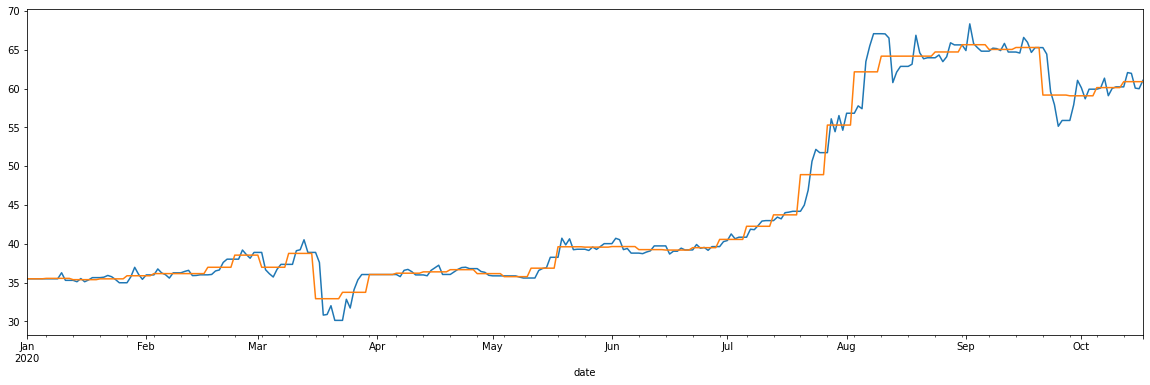

In [254]:
plot_for_list(silver_list)

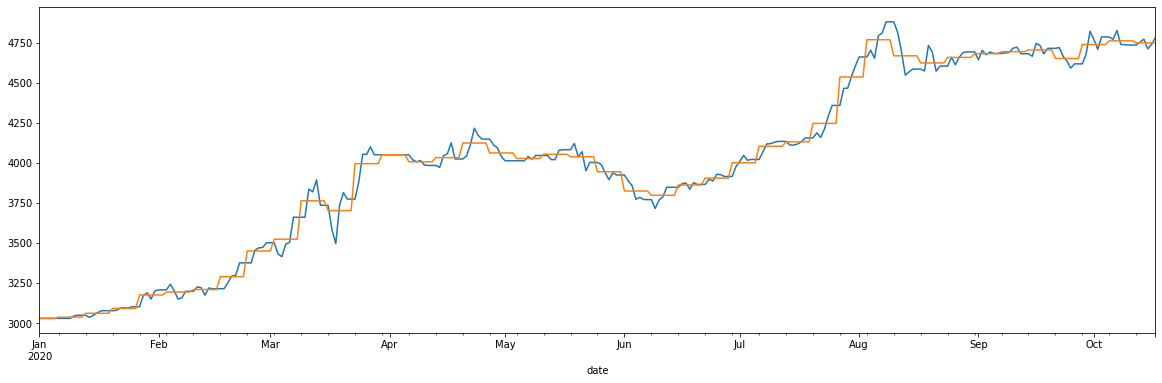

In [255]:
plot_for_list(gold_list)

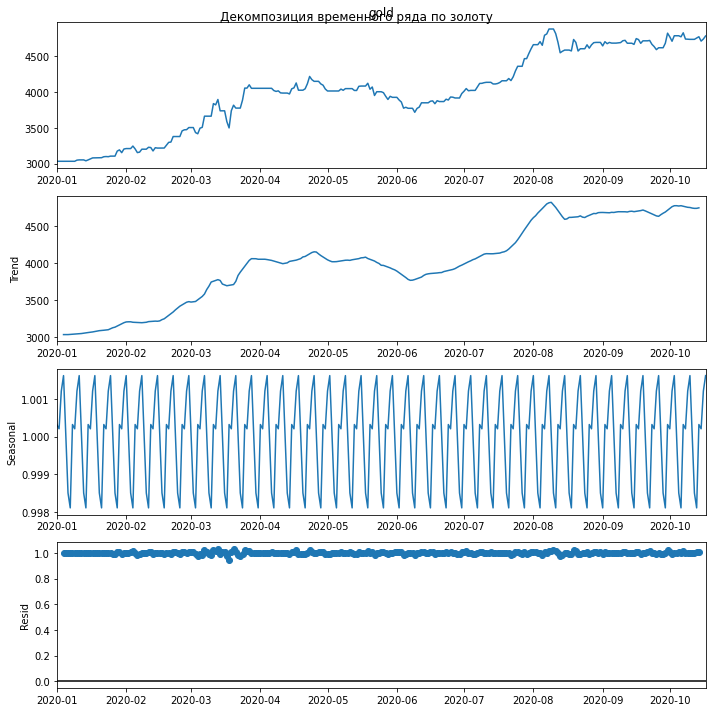

In [275]:
result = seasonal_decompose(df['gold'], model='multiplicative')
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Декомпозиция временного ряда по золоту')
plt.show()

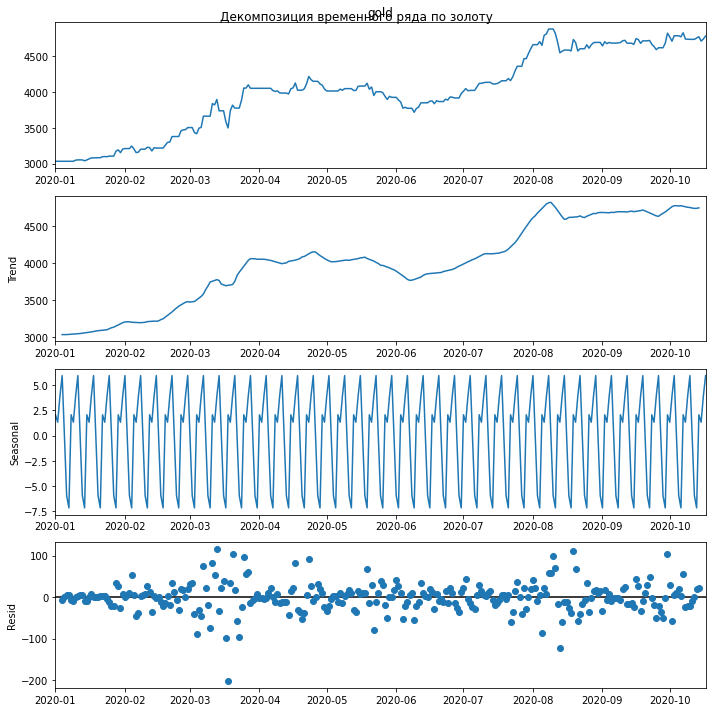

In [276]:
result = seasonal_decompose(df['gold'], model='additive')
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Декомпозиция временного ряда по золоту')
plt.show()

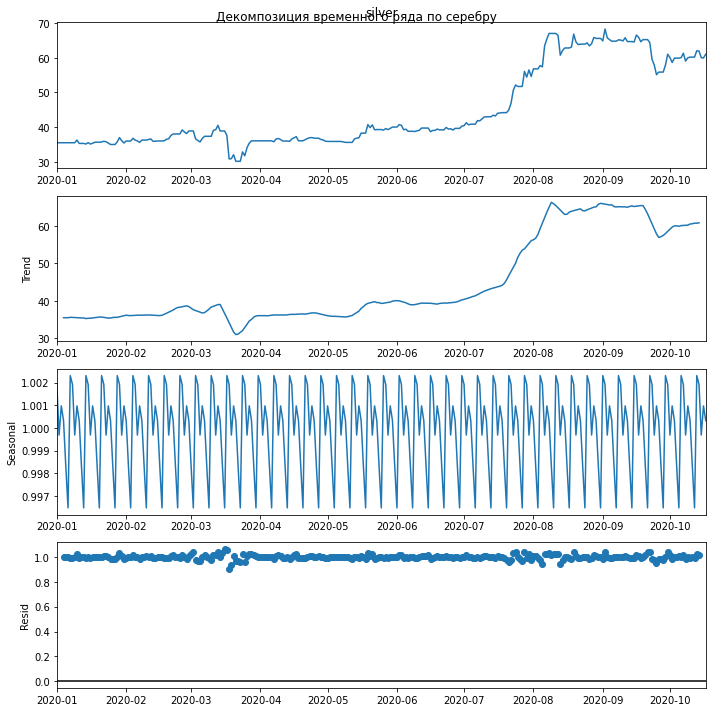

In [277]:
result = seasonal_decompose(df['silver'], model='multiplicative')
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Декомпозиция временного ряда по серебру')
plt.show()

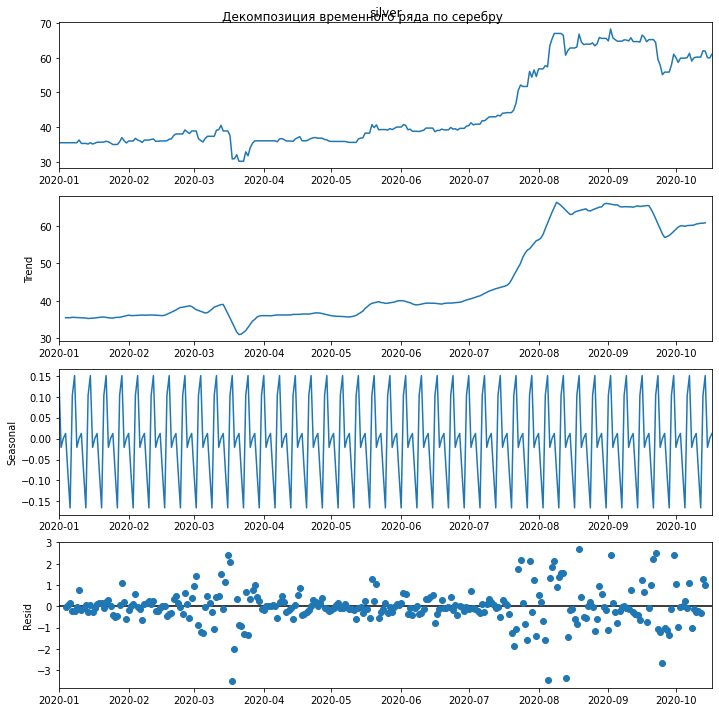

In [278]:
result = seasonal_decompose(df['silver'], model='additive')
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Декомпозиция временного ряда по серебру')
plt.show()

In [ ]:
# тут построить разложения по месяцам

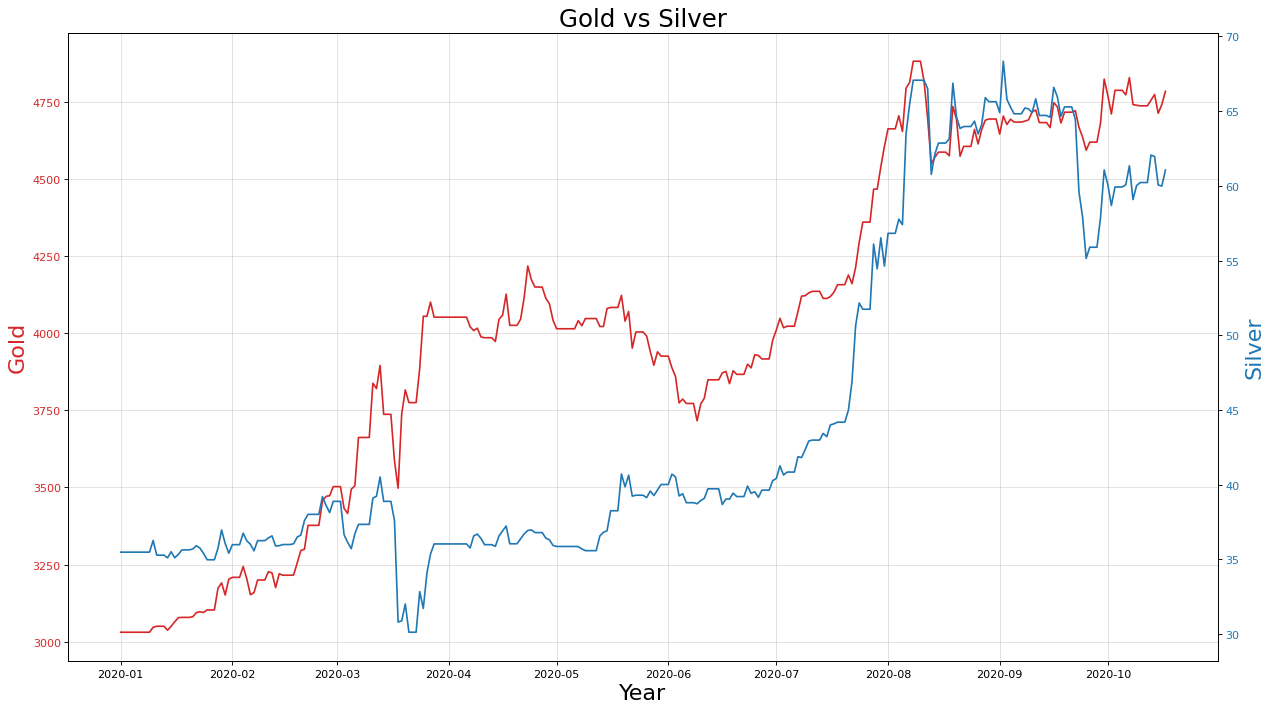

In [283]:
# золото и серебро

# x = df['date']
y1 = df['gold']
y2 = df['silver']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
# ax1.plot(x, y1, color='tab:red')
ax1.plot(y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.plot(x, y2, color='tab:blue')
ax2.plot(y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
# ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Gold', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Silver", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
# ax2.set_xticks(np.arange(0, len(x), 60))
# ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Gold vs Silver", fontsize=22)
fig.tight_layout()
plt.show()

In [ ]:
# тут можно построить такие сравнения по месяцам

In [259]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

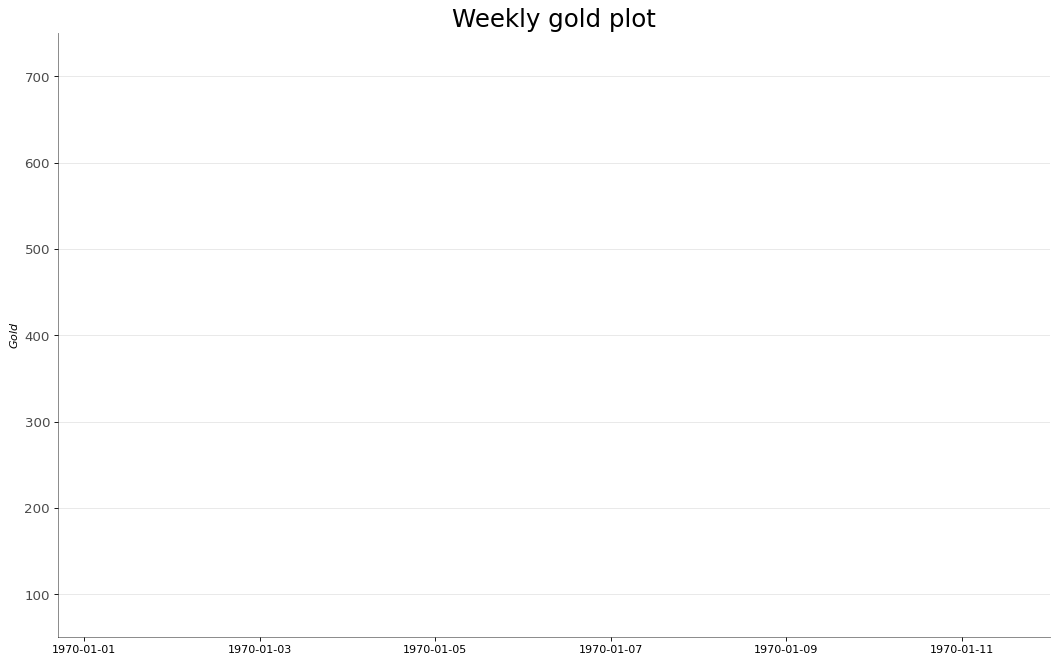

In [290]:
# график сезонов


# df['year'] = [parse(d).year for d in df.date]
# df['month'] = [parse(d).strftime('%b') for d in df.date]
months = df['month'].unique()

# Draw Plot
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
plt.figure(figsize=(16,10), dpi= 80)

for i, y in enumerate(months):
#     print(i, y)
    plt.plot('gold', 
             data=df.loc[df.month==y, :], 
             color=mycolors[i], 
             label=y)
#     plt.text(df.loc[df.month==y, :].shape[0]-.9, df.loc[df.month==y, 'gold'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.ylim(50,750)
plt.xlim(-0.3, 11)
plt.ylabel('$Gold$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Weekly gold plot", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
# plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()

In [96]:
df.to_csv('docs/drags.csv')